<div style="font-size:18pt; padding-top:20px; text-align:center">СЕМИНАР 7. <b>Регрессия и </b> <span style="font-weight:bold; color:green">NumPy/SciPy/Sklearn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Линейная регрессия</a></li>
        <li><a href="#2">Метод k ближайших соседей</a>
        <li><a href="#3">Полиномиальная регрессия</a>
        <li><a href="#4">Источники</a>
        </li>
    </ol>
</div>

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Линейная регрессия</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
n = 100
x = stats.uniform.rvs(size=n, loc=4, scale=8)
x[:5]

array([  4.18597976,  10.06242952,   4.78159694,   4.14620548,   6.19039902])

In [4]:
y = 2 + 0.3*x
y[:5]

array([ 3.25579393,  5.01872886,  3.43447908,  3.24386164,  3.85711971])

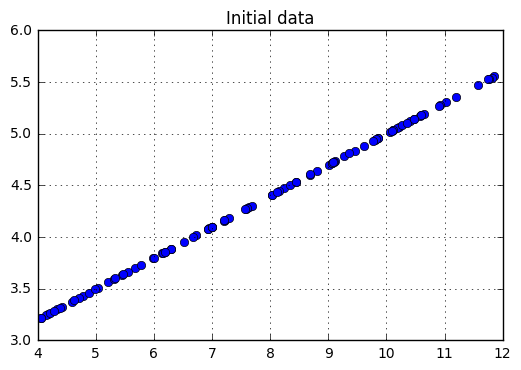

In [5]:
plt.title("Initial data")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

In [6]:
mu = 0
sigma = 0.5
y1 = stats.norm.rvs(size=n, loc=mu, scale=sigma) + y
y1[:5]

array([ 1.96842575,  4.51897491,  3.36823112,  2.94645546,  4.03561185])

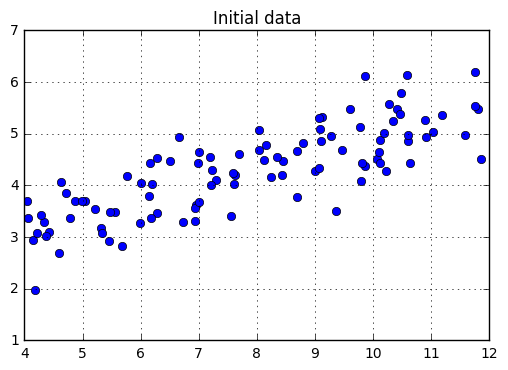

In [7]:
plt.title("Initial data")
plt.plot(x, y1, "o")
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [8]:
tr_pr = 0.7
tr_n = int(np.round(tr_pr*n))

In [9]:
x_train = np.array([x[:tr_n]]).T
x_test = np.array([x[tr_n:]]).T

In [10]:
x_train = x[:tr_n, np.newaxis]
x_test = x[tr_n:, np.newaxis]

In [11]:
y_train = y[:tr_n]
y_test = y[tr_n:]

In [12]:
y1_train = y1[:tr_n]
y1_test = y1[tr_n:]

In [13]:
len(x_train)+len(y_train)

140

<p><b>Обучение</b></p>

In [14]:
linRegModel_y = LinearRegression()
linRegModel_y1 = LinearRegression()

In [15]:
#Модель для y
lrModelTr_y = linRegModel_y.fit(x_train, y_train)
lrModelTr_y

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print("Коэффициенты (наклон): ", lrModelTr_y.coef_)
print("Пересечение: ", lrModelTr_y.intercept_)

Коэффициенты (наклон):  [ 0.3]
Пересечение:  2.0


In [17]:
lrModelTr_y1 = linRegModel_y1.fit(x_train, y1_train)
lrModelTr_y1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
print("Коэффициенты (наклон): ", lrModelTr_y1.coef_)
print("Пересечение: ", lrModelTr_y1.intercept_)

Коэффициенты (наклон):  [ 0.30310836]
Пересечение:  1.89459358917


In [19]:
f_x = lambda x : x * lrModelTr_y.coef_ + lrModelTr_y.intercept_
f_x_1 = lambda x : x * lrModelTr_y1.coef_ + lrModelTr_y1.intercept_

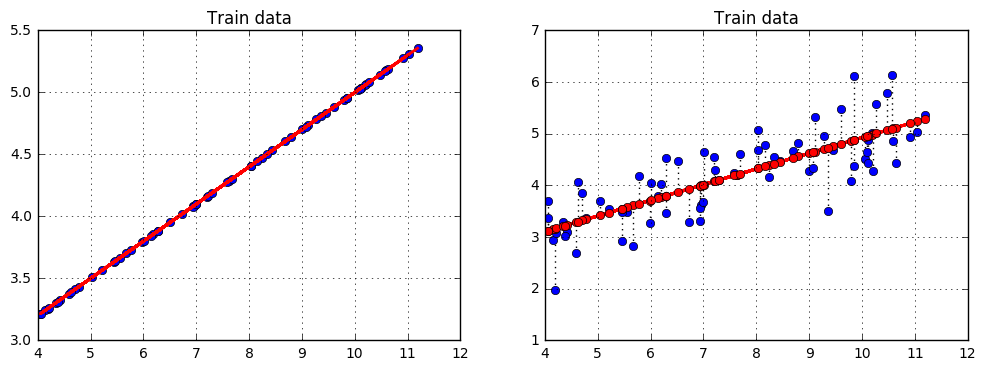

In [20]:
xx = np.linspace(0,5,100)

plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(x_train, f_x(x_train),color="red", lw=2)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Train data")
plt.plot(x_train, y1_train, "o")
plt.plot(x_train, f_x_1(x_train), "o-", color="red", lw=2)
plt.vlines(x_train, ymin=y1_train, ymax=f_x_1(x_train), colors="black", linestyles="dotted", lw=1)
plt.grid(True)

<p><b>Проверка на тестовом подмножестве</b></p>

In [21]:
y_lr_test = linRegModel_y.predict(x_test)
y1_lr_test = linRegModel_y1.predict(x_test)

In [22]:
tss_y = ((y_test - y_test.mean())**2).sum()
tss_y1 = ((y1_test - y1_test.mean())**2).sum()

In [23]:
rss_y = ((y_lr_test - y_test)**2).sum()
rss_y1 = ((y1_lr_test - y1_test)**2).sum()

In [24]:
print("Модель для y")
print("Сумма квадратов (TSS):", tss_y)
print("Остаточная сумма квадратов (RSS):", rss_y)
print("Коэффициент детерминации (R^2):", 1 - rss_y/tss_y)

Модель для y
Сумма квадратов (TSS): 14.5509199928
Остаточная сумма квадратов (RSS): 3.54987407349e-30
Коэффициент детерминации (R^2): 1.0


In [25]:
print("Модель для y1")
print("Сумма квадратов (TSS):", tss_y1)
print("Остаточная сумма квадратов (RSS):", rss_y1)
print("Коэффициент детерминации (R^2):", 1 - rss_y1/tss_y1)

Модель для y1
Сумма квадратов (TSS): 19.6178962307
Остаточная сумма квадратов (RSS): 6.59832985447
Коэффициент детерминации (R^2): 0.663657622771


In [26]:
linRegModel_y.score(x_test, y_test)

1.0

In [27]:
linRegModel_y.score(x_test, y1_test)

0.66616052826694183

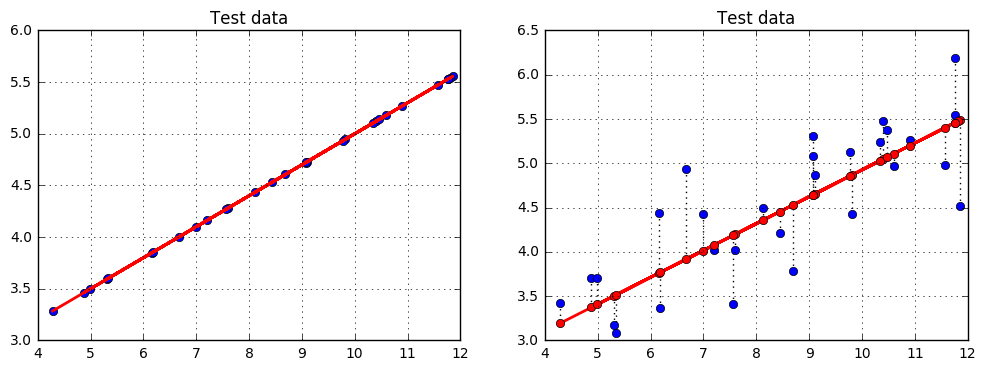

In [28]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Test data")
plt.plot(x_test, y_test, "o")
plt.plot(x_test, f_x(x_test), color="red", lw=2)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.plot(x_test, y1_test, "o")
plt.plot(x_test, f_x_1(x_test), "o-", color="red", lw=2)
plt.vlines(x_test, ymin=y1_test, ymax=y1_lr_test, colors="black", linestyles="dotted")
plt.grid(True)

plt.show()

<p><b>Графики</b></p>

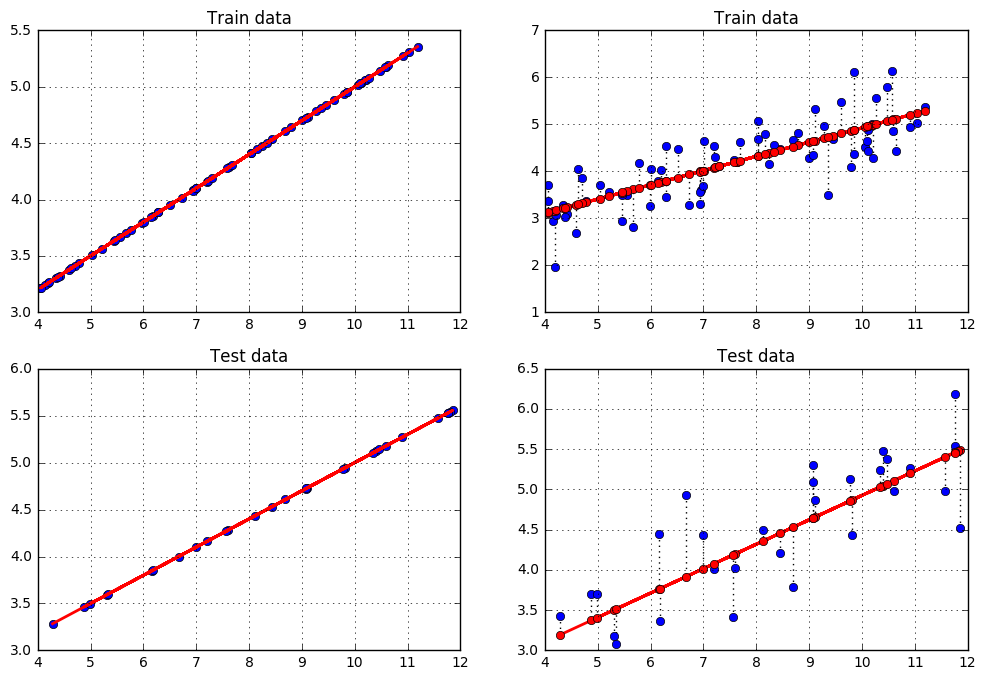

In [29]:
plt.figure(1, figsize=[12, 8])

plt.subplot(2,2,1)
plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(x_train, f_x(x_train),color="red", lw=2)
plt.grid(True)

plt.subplot(2,2,2)
plt.title("Train data")
plt.plot(x_train, y1_train, "o")
plt.plot(x_train, f_x_1(x_train), "o-", color="red", lw=2)
plt.vlines(x_train, ymin=y1_train, ymax=f_x_1(x_train), colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.subplot(2,2,3)
plt.title("Test data")
plt.plot(x_test, y_test, "o")
plt.plot(x_test, f_x(x_test), color="red", lw=2)
plt.grid(True)

plt.subplot(2,2,4)
plt.title("Test data")
plt.plot(x_test, y1_test, "o")
plt.plot(x_test, f_x_1(x_test), "o-", color="red", lw=2)
plt.vlines(x_test, ymin=y1_test, ymax=f_x_1(x_test), colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.show()

<p><b>Что если зависимоть имеет следующий вид</b></p>

In [30]:
n = 100
x = stats.uniform.rvs(size=n, loc=0, scale=5)
y = stats.norm.rvs(size=n, loc=0, scale=0.2) + np.sin(x)

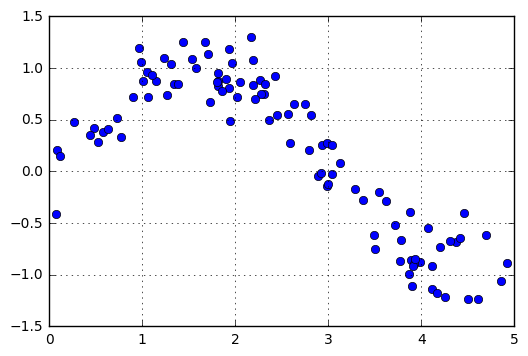

In [31]:
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p>Разделение исходных данных на обучающее и тестовое подмножества</p>

In [32]:
x_train = x[:tr_n, np.newaxis]
x_test = x[tr_n:, np.newaxis]

y_train = y[:tr_n]
y_test = y[tr_n:]

<p>Обучение</p>

In [33]:
linRegModel_y = LinearRegression()
lrModelTr_y = linRegModel_y.fit(x_train, y_train)

In [34]:
f_x = lambda x : x * lrModelTr_y.coef_ + lrModelTr_y.intercept_

<p>Тестирование</p>

In [35]:
linRegModel_y.score(x_test, y_test)

0.617251171140618

<p>Графики</p>

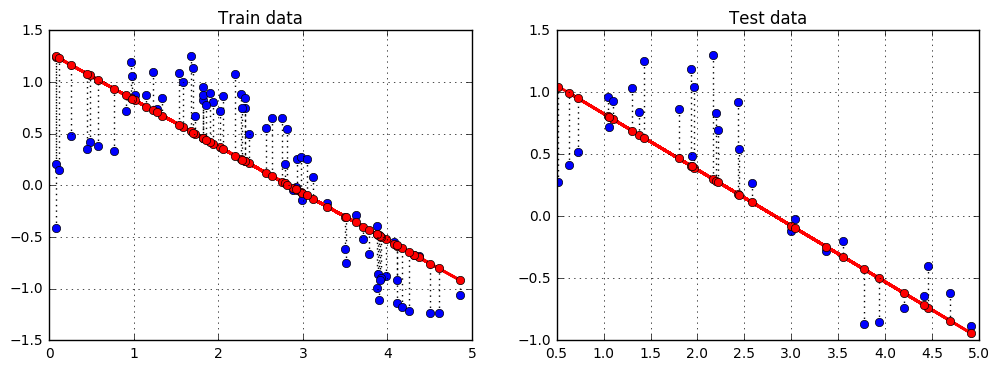

In [36]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(x_train, lrModelTr_y.predict(x_train), color="red", lw=2)
plt.plot(x_train, lrModelTr_y.predict(x_train), "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=lrModelTr_y.predict(x_train), colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.plot(x_test, y_test, "o")
plt.plot(x_test, lrModelTr_y.predict(x_test), color="red", lw=2)
plt.plot(x_test, lrModelTr_y.predict(x_test), "o", color="red", lw=2)
plt.vlines(x_test, ymin=y_test, ymax=lrModelTr_y.predict(x_test), colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.show()

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Метод k ближайших соседей</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
n = 100
x = stats.uniform.rvs(size=n, loc=0, scale=5)
y = stats.norm.rvs(size=n, loc=0, scale=0.2) + np.sin(x)

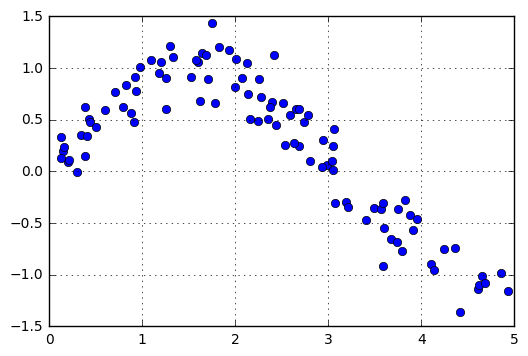

In [39]:
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [40]:
tr_pr = 0.7
tr_n = int(np.round(tr_pr*n))

x_train = x[:tr_n, np.newaxis]
x_test = x[tr_n:, np.newaxis]

y_train = y[:tr_n]
y_test = y[tr_n:]

<p><b>Обучение</b></p>

In [41]:
knnModel = {}
for k in [2, 5, 15]:
    model =  KNeighborsRegressor(n_neighbors=k, weights="uniform", algorithm="auto", 
                                 metric="minkowski", p=2, n_jobs=1)
    knnModel[k] = model.fit(x_train, y_train)

In [42]:
y_train_pred_2 = knnModel[2].predict(x_train)
y_train_pred_5 = knnModel[5].predict(x_train)
y_train_pred_15 = knnModel[15].predict(x_train)

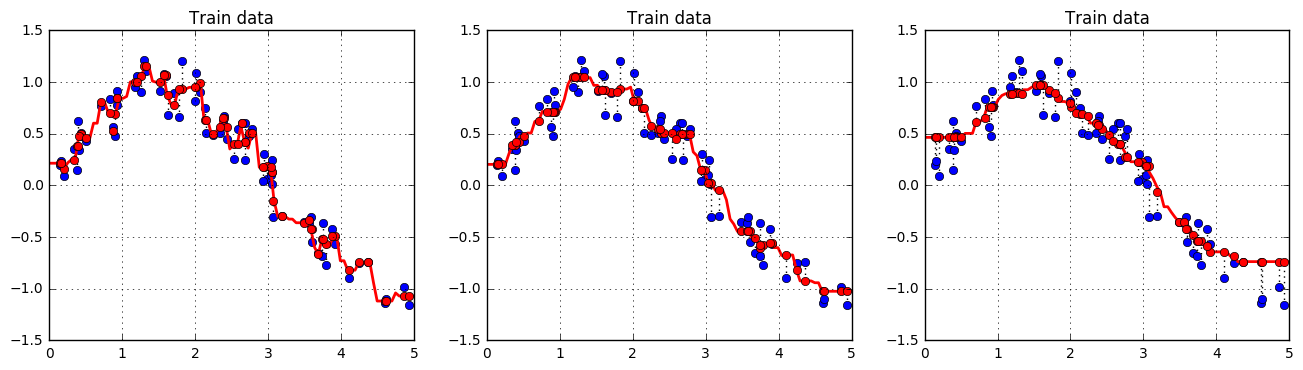

In [43]:
xx = np.linspace(0,5,100).reshape((100, 1))

plt.figure("knn-train", figsize=[16,4])

plt.subplot(1,3,1)
plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, knnModel[2].predict(xx), color="red", lw=2)
plt.plot(x_train, y_train_pred_2, "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=y_train_pred_2, colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.subplot(1,3,2)
plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, knnModel[5].predict(xx), color="red", lw=2)
plt.plot(x_train, y_train_pred_5, "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=y_train_pred_5, colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.subplot(1,3,3)
plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, knnModel[15].predict(xx), color="red", lw=2)
plt.plot(x_train, y_train_pred_15, "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=y_train_pred_15, colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.show()

<p><b>Проверка на тестовом подмножестве</b></p>

In [44]:
y_pr_test_2 = knnModel[2].predict(x_test)

tss_y = ((y_test - y_test.mean())**2).sum()
rss_y = ((y_pr_test_2 - y_test)**2).sum()

print("Модель для y")
print("Сумма квадратов (TSS):", tss_y)
print("Остаточная сумма квадратов (RSS):", rss_y)
print("Коэффициент детерминации (R^2):", 1 - rss_y/tss_y)

Модель для y
Сумма квадратов (TSS): 18.2491480967
Остаточная сумма квадратов (RSS): 2.88293101694
Коэффициент детерминации (R^2): 0.842023802883


In [45]:
y_pr_test_5 = knnModel[5].predict(x_test)

tss_y = ((y_test - y_test.mean())**2).sum()
rss_y = ((y_pr_test_5 - y_test)**2).sum()

print("Модель для y")
print("Сумма квадратов (TSS):", tss_y)
print("Остаточная сумма квадратов (RSS):", rss_y)
print("Коэффициент детерминации (R^2):", 1 - rss_y/tss_y)

Модель для y
Сумма квадратов (TSS): 18.2491480967
Остаточная сумма квадратов (RSS): 2.49047783078
Коэффициент детерминации (R^2): 0.863529090915


In [46]:
y_pr_test_15 = knnModel[15].predict(x_test)

tss_y = ((y_test - y_test.mean())**2).sum()
rss_y = ((y_pr_test_15 - y_test)**2).sum()

print("Модель для y")
print("Сумма квадратов (TSS):", tss_y)
print("Остаточная сумма квадратов (RSS):", rss_y)
print("Коэффициент детерминации (R^2):", 1 - rss_y/tss_y)

Модель для y
Сумма квадратов (TSS): 18.2491480967
Остаточная сумма квадратов (RSS): 2.97109817266
Коэффициент детерминации (R^2): 0.837192500334


<p><b>Графики</b></p>

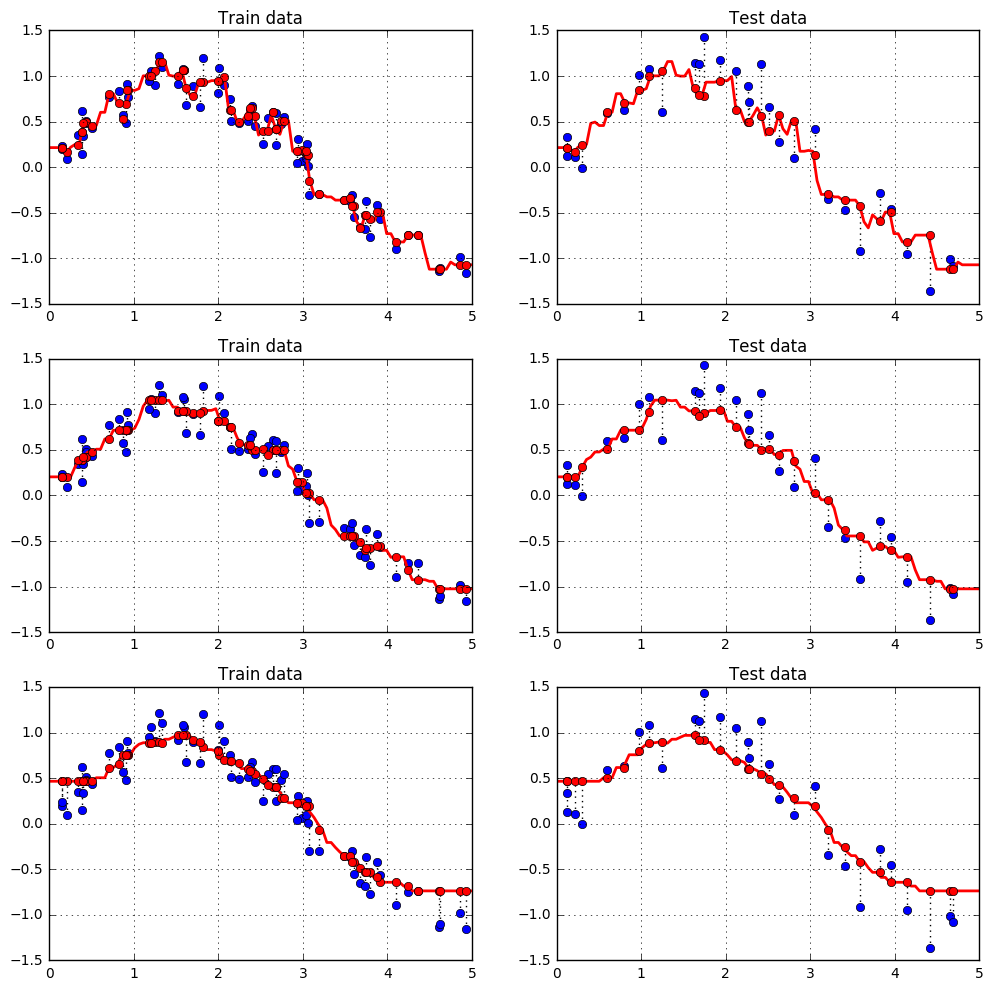

In [47]:
plt.figure(1, figsize=[12, 12])

plt.subplot(3,2,1)
plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, knnModel[2].predict(xx.reshape(len(xx),1)), color="red", lw=2)
plt.plot(x_train, y_train_pred_2, "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=y_train_pred_2, colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.subplot(3,2,2)
plt.title("Test data")
plt.plot(x_test, y_test, "o")
plt.plot(xx, knnModel[2].predict(xx.reshape(len(xx),1)), color="red", lw=2)
plt.plot(x_test, y_pr_test_2, "o", color="red", lw=2)
plt.vlines(x_test, ymin=y_test, ymax=y_pr_test_2, colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.subplot(3,2,3)
plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, knnModel[5].predict(xx.reshape(len(xx),1)), color="red", lw=2)
plt.plot(x_train, y_train_pred_5, "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=y_train_pred_5, colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.subplot(3,2,4)
plt.title("Test data")
plt.plot(x_test, y_test, "o")
plt.plot(xx, knnModel[5].predict(xx.reshape(len(xx),1)), color="red", lw=2)
plt.plot(x_test, y_pr_test_5, "o", color="red", lw=2)
plt.vlines(x_test, ymin=y_test, ymax=y_pr_test_5, colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.subplot(3,2,5)
plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, knnModel[15].predict(xx.reshape(len(xx),1)), color="red", lw=2)
plt.plot(x_train, y_train_pred_15, "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=y_train_pred_15, colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.subplot(3,2,6)
plt.title("Test data")
plt.plot(x_test, y_test, "o")
plt.plot(xx, knnModel[15].predict(xx.reshape(len(xx),1)), color="red", lw=2)
plt.plot(x_test, y_pr_test_15, "o", color="red", lw=2)
plt.vlines(x_test, ymin=y_test, ymax=y_pr_test_15, colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.show()

<a name="3"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">3. Полиномиальная регрессия</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from numpy.polynomial.polynomial import polyval

In [49]:
n = 100
x = stats.uniform.rvs(size=n, loc=0, scale=5)
y = stats.norm.rvs(size=n, loc=0, scale=0.2) + np.sin(x)

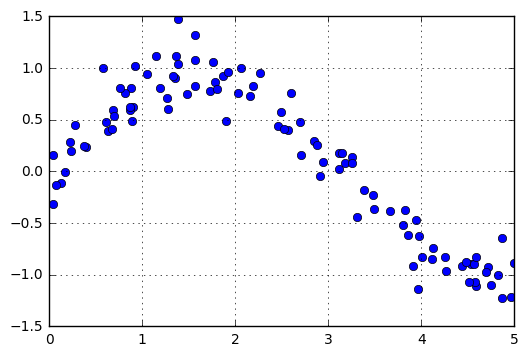

In [50]:
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [51]:
tr_pr = 0.7
tr_n = int(np.round(tr_pr*n))

In [52]:
x_train = x[:tr_n, np.newaxis]
x_test = x[tr_n:, np.newaxis]

In [53]:
y_train = y[:tr_n]
y_test = y[tr_n:]

<p><b>Обучение</b></p>

In [54]:
pf = PolynomialFeatures(degree=3)
pf_tfrd = pf.fit_transform(x_train)

In [55]:
lr = LinearRegression(fit_intercept=True)
lr = lr.fit(pf_tfrd, y_train)

In [56]:
print("Коэффициенты: ", lr.coef_)
print("Пересечение: ", lr.intercept_)

Коэффициенты:  [ 0.          1.91869726 -0.84364774  0.08592345]
Пересечение:  -0.309243683471


<p>или можно использовать Pipeline</p>

In [57]:
plModelTr_PL = Pipeline([("plF", PolynomialFeatures(degree=3)), ("lr", LinearRegression(fit_intercept=True))])

In [58]:
plModelTr_PL = plModelTr_PL.fit(x_train, y_train)

In [59]:
print("Коэффициенты: ", plModelTr_PL.named_steps["lr"].coef_)
print("Пересечение: ", plModelTr_PL.named_steps["lr"].intercept_)

Коэффициенты:  [ 0.          1.91869726 -0.84364774  0.08592345]
Пересечение:  -0.309243683471


In [60]:
f_x = lambda x : polyval(x, plModelTr_PL.named_steps["lr"].coef_) + plModelTr_PL.named_steps["lr"].intercept_

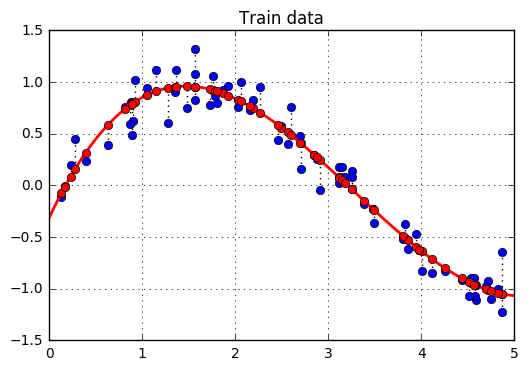

In [61]:
xx = np.linspace(0,5,100)

plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, f_x(xx), color="red", lw=2)
plt.plot(x_train, f_x(x_train), "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=f_x(x_train), colors="black", linestyles="dotted", lw=1)
plt.grid(True)
plt.show()

<p><b>Проверка на тестовом подмножестве</b></p>

In [62]:
y_pr_test = plModelTr_PL.predict(x_test)

In [63]:
tss_y = ((y_test - y_test.mean())**2).sum()
rss_y = ((y_pr_test - y_test)**2).sum()

In [64]:
print("Модель для y")
print("Сумма квадратов (TSS):", tss_y)
print("Остаточная сумма квадратов (RSS):", rss_y)
print("Коэффициент детерминации (R^2):", 1 - rss_y/tss_y)

Модель для y
Сумма квадратов (TSS): 16.572647048
Остаточная сумма квадратов (RSS): 1.69220702761
Коэффициент детерминации (R^2): 0.897891566585


In [65]:
plModelTr_PL.score(x_test, y_test)

0.8978915665852758

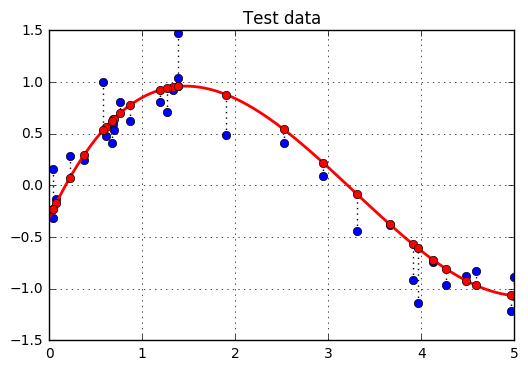

In [66]:
plt.title("Test data")
plt.plot(x_test, y_test, "o")
plt.plot(xx, f_x(xx), color="red", lw=2)
plt.plot(x_test, f_x(x_test), "o", color="red", lw=2)
plt.vlines(x_test, ymin=y_test, ymax=f_x(x_test), colors="black", linestyles="dotted", lw=1)
plt.grid(True)
plt.show()

<p><b>Графики</b></p>

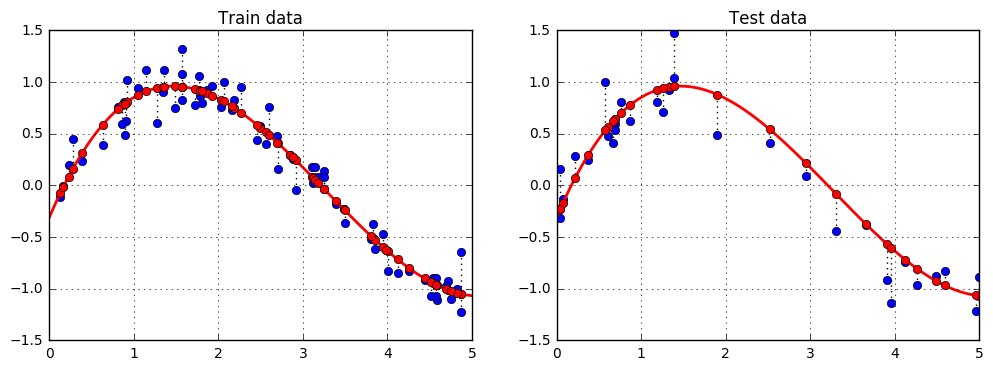

In [67]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, f_x(xx), color="red", lw=2)
plt.plot(x_train, f_x(x_train), "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=f_x(x_train), colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.plot(x_test, y_test, "o")
plt.plot(xx, f_x(xx), color="red", lw=2)
plt.plot(x_test, f_x(x_test), "o", color="red", lw=2)
plt.vlines(x_test, ymin=y_test, ymax=f_x(x_test), colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.show()

<a name="4"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">4. Источники</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [68]:
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

SyntaxError: invalid syntax (<ipython-input-68-97fd8bff3926>, line 1)